<a href="https://colab.research.google.com/github/choi-yongsuk/deep-learning-nlp/blob/master/imdb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install feedparser
!pip install newspaper3k
!pip install konlpy

#!pip install bs4
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 8.2 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=0fc18e46ba6e72233ca2589d1187bde66030ce81a3860676ff33d0dea2d48310
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 21.3 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
     |████████████████████████████████| 7.4 MB 65.9 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=cfcd25dfe6128819c99f13dc1a3827fa6976774a77b759d11427d18f05bbdb5b
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created whee

In [30]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

# IMDB 데이터다운로드

data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", #downloaded file name
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
      extract=True)

84140032/84125825 [==============================] - 5s 0us/step


In [31]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
      with open(os.path.join(directory, file_path), "r",encoding='utf-8') as file:
        data["review"].append(file.read())
    return pd.DataFrame.from_dict(data)

def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    return pd.concat([pos_df, neg_df])

#학습    
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))

#테스를
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))



In [34]:
print(train_df.head())

                                              review  sentiment
0  Frailty--8/10--It's non-sensical title and "Bi...          1
1  I loved this movie. It is a definite inspirati...          1
2  Another review likened this troupe to a cross ...          1
3  This is a long lost horror gem starring Sydney...          1
4  I loved the way EARTH is made. Its photography...          1


In [ ]:
reviews = list(train_df['review'])
#->print(reviews[0])

# 문자열 문장 리스트를 토큰화
tokenized_reviews = [r.split() for r in reviews]
#->print(tokenized_reviews[0])

# 토큰화된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
#->print(review_len_by_token[0])

# 토큰화된 것을 붙여서 음절의 길이를 저장
review_len_by_alphabet = [len(s.replace(' ','')) for s in reviews]
#->print(review_len_by_alphabet[0])



Text(0, 0.5, 'Number of Reviews')

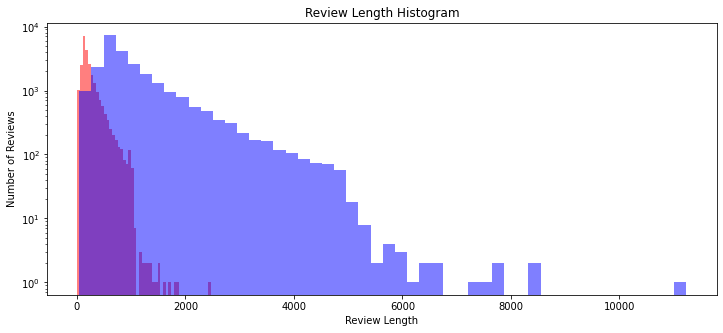

In [9]:
import matplotlib.pyplot as plt
# 이미지 사이즈 선언, figsize: (가로, 세로) 형태의 튜블로 입력
plt.figure(figsize=(12,5))

#히스토그램 선언
# bins: 히스토그갬 값들에 대한 버킷 범위
# range: x축 값의 범위
# alphpa: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목, x축 라벨, y축 라벨
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')


In [10]:
import numpy as np

print('문장 단어의 개수가 가장 많은: ', np.max(review_len_by_token))
print('문장 단어의 개수가 가장 작은: ', np.min(review_len_by_token))
print('문장 평균길이: ', np.mean(review_len_by_token))
print('문장 길이 표준편차: ', np.std(review_len_by_token))
print('문장 중간길이: ', np.median(review_len_by_token))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1사분위 길이: ', np.percentile(review_len_by_token, 25))
print('제 3사분위 길이: ', np.percentile(review_len_by_token, 75))


문장 단어의 개수가 가장 많은:  2470
문장 단어의 개수가 가장 작은:  10
문장 평균길이:  233.7872
문장 길이 표준편차:  173.72955740506563
문장 중간길이:  174.0
제 1사분위 길이:  127.0
제 3사분위 길이:  284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f0e5b1f2450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0e5b1f74d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e5b200a50>],
 'means': [<matplotlib.lines.Line2D at 0x7f0e5b200510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e5b1f7f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0e5b1f2a10>,
  <matplotlib.lines.Line2D at 0x7f0e5b1f2f50>]}

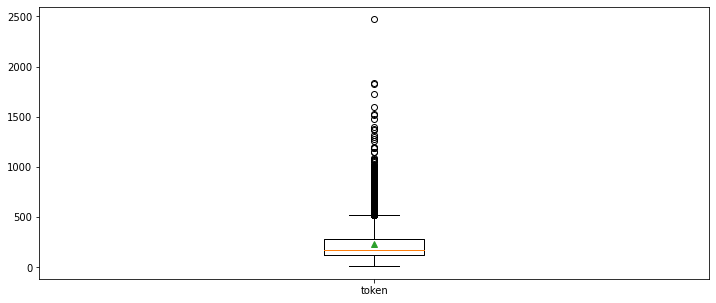

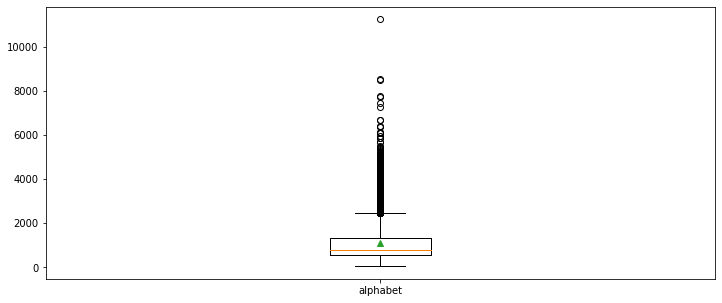

In [11]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_alphabet],
             labels=['alphabet'],
             showmeans=True)

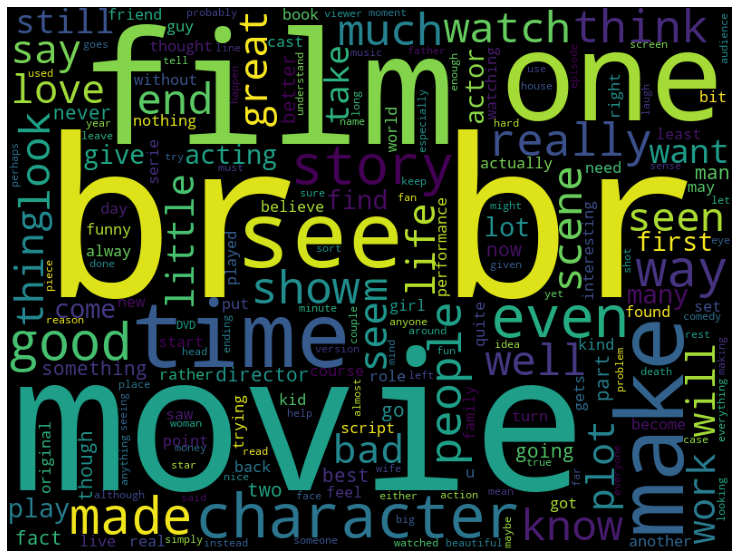

In [12]:
from pyparsing.core import Word
from wordcloud import WordCloud, STOPWORDS #
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width =800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


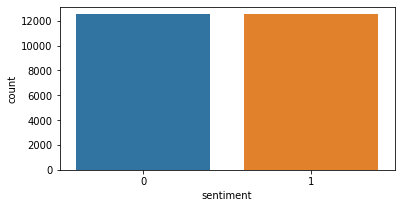

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])
plt.show()


kaggle word2vec

In [17]:
# /content/drive/MyDrive/nlp-data/word2vec-nlp-tutorial.zip

import zipfile
DATA_IN_PATH = '/content/drive/MyDrive/nlp-data/'
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()


In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("파일크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data.head())

print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_length = train_data['review'].apply(len)
print(train_length.head())


파일크기 : 
testData.tsv                  32.72MB
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB
         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
전체 학습데이터의 개수: 25000
0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64


In [ ]:
# imdb를 위해 복제한 코드

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("파일크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

train_data = pd.read_csv( DATA_IN_PATH + '', header = 0, delimiter = '\t', quoting = 3)
print(train_data.head())



print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_length = train_data['review'].apply(len)
print(train_length.head())


In [45]:
train_data = train_df

print(train_data.head())

                                              review  sentiment
0  Frailty--8/10--It's non-sensical title and "Bi...          1
1  I loved this movie. It is a definite inspirati...          1
2  Another review likened this troupe to a cross ...          1
3  This is a long lost horror gem starring Sydney...          1
4  I loved the way EARTH is made. Its photography...          1


In [20]:
print("")
print('리뷰 길이 개수가 가장 많은: ', format(np.max(train_length)))
print('리뷰 길이 개수가 가장 작은: ', format(np.min(train_length)))
print('리뷰 길이 평균 값: ', format(np.mean(train_length)))
print('리뷰 길이 표준편차: ', format(np.std(train_length)))
print('리뷰 길이 중간 값: ', format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1사분위 길이: ', format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3사분위 길이: ', format(np.percentile(train_length, 75)))



print("")
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))
print('리뷰 단어 개수가 가장 많은: ', format(np.max(train_length)))
print('리뷰 단어 개수가 가장 작은: ', format(np.min(train_length)))
print('리뷰 단어 평균길이: ', format(np.mean(train_length)))
print('리뷰 단어  표준편차: ', format(np.std(train_length)))
print('문장 중간길이: ', format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 제 1사분위: ', format(np.percentile(train_length, 25)))
print('리뷰 단어 제 3사분위: ', format(np.percentile(train_length, 75)))

print("")
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
print("물음표가 있는 질문: [:.2f]%".format(qmarks * 100))
print("마침표가 있는 질문: [:.2f]%".format(fullstop * 100))
print("첫 글자가 대문자 인 질문: [:.2f]%".format(capital_first * 100))
print("대문자가있는 질문: [:.2f]%".format(capitals * 100))
print("숫자가있는 질문: [:.2f]%".format(numbers * 100))



리뷰 길이 개수가 가장 많은:  13710
리뷰 길이 개수가 가장 작은:  54
리뷰 길이 평균 값:  1329.71056
리뷰 길이 표준편차:  1005.2191407969142
리뷰 길이 중간 값:  983.0
리뷰 길이 제 1사분위 길이:  705.0
리뷰 길이 제 3사분위 길이:  1619.0

리뷰 단어 개수가 가장 많은:  13710
리뷰 단어 개수가 가장 작은:  54
리뷰 단어 평균길이:  1329.71056
리뷰 단어  표준편차:  1005.2191407969142
문장 중간길이:  983.0
리뷰 단어 제 1사분위:  705.0
리뷰 단어 제 3사분위:  1619.0

물음표가 있는 질문: [:.2f]%
마침표가 있는 질문: [:.2f]%
첫 글자가 대문자 인 질문: [:.2f]%
대문자가있는 질문: [:.2f]%
숫자가있는 질문: [:.2f]%


Preprocessing

In [13]:
import re
import json
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [14]:
DATA_IN_PATH = '/content/drive/MyDrive/nlp-data/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)

review = train_data['review'][0] # 첫 번째 리뷰를 가져옴
review_text = BeautifulSoup(review, "html5lib").get_text() # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) # 영어 문자를 제외한 나머지는 모두 공백으로 바꿈
print(review_text)

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # 영어 불용어 집합 구성

review_txt = review_text.lower()
words = review_text.split() # 소문자 변환 후 단어마다 나눠서 단어 리스트로 만듦
words = [w for w in words if not w in stop_words] # 불용어를 제거한 리스트를 구성함
print(words)
clean_review = ' '.join(words) # 단어 리스트들을 다시 하나의 글로 합침
print(clean_review)


 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Preprocessing (Part2)

def preprocessing(review, remove_stopwords = False):
  # 불용어 제거는 옵션으로 선택 가능(remove_stopwords)
  # 1. HTML 태그 제거
  review_text = BeautifulSoup(review, "html5lib").get_text()
  # 2. 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
  review_text = re.sub("[^a-zA-Z]", " ", review_text)
  # 3. 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다. 
  words = review_text.lower().split()

  if remove_stopwords:
    # 4. 불용어들을 제거
    # 영어에 관련된 불용어 불러오기
    stops = set(stopwords.words("english"))
    # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
    words = [w for w in words if not w in stops]
    # 5. 단어 리스트를 공백을 넣어서 하나의 글로 합침
    clean_review = ' '.join(words)
  else: # 불용어들을 제거하지 않는 경우
    clean_review = ' '.join(words)

  return clean_review

clean_train_reviews = []
for review in train_data['review']:
  clean_train_reviews.append(preprocessing(review, remove_stopwords= True))
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})


In [19]:
# Preprocessing (Part 3)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
print(text_sequences[0])

word_vocab = tokenizer.word_index
print(word_vocab)

print("전체 단어 개수: ", len(word_vocab) + 1)

data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

MAX_SEQUENCE_LENGTH = 174

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

train_lables = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_lables.shape)



[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [23]:
from matplotlib.cbook import open_file_cm
# Preprocessing (Part4)

TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABLE_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'  # 필요
DATA_CONFIGS = 'data_configs.json'

import os
# 저장하는 디렉토리가 존자하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABLE_DATA, 'wb'), train_lables)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)   # 필요

# 데이터를 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)


In [ ]:
'''
1. 클러스터링 알고리즘 k-means  
2. tf-idf 철자 의미
3. 자연어 처리 기초 벡터 과차원 저밀도 -> 저차원 고밀도로 바꾼다 
4. 코사인 시뮬리 -> 관계없으면 0 , 관련 있으면?  ? 음수 
5. 
6. 
7. 
8. 
9.
10. 
'''

In [20]:
# 위의 코드에서 필요한 것만 실행
TRAIN_CLEAN_DATA = 'train_clean.csv'  # 필요
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)  # 필요

In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

DATA_IN_PATH = '/content/drive/MyDrive/nlp-data/'
DATA_OUT_PATH = '/content/drive/MyDrive/nlp-data/'
TRAIN_CLEAN_DATA = 'train_clean.csv'
RANDOM_SEED = 42
TEST_SPLIT = 0.2

tain_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000)
x = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(x_train, y_train)
predicted = lgs.predict(x_eval)
print("Accuracy: %f" % lgs.score(x_eval, y_eval)) 



Accuracy: 0.869600


# 4: 단계: keras Code 붙여보기

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

x_train1 = x_train.toarray()
x_eval1 = x_eval.toarray()

# Model, Cost, Train
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train1, y_train, epochs=200, verbose=1)

# Testing
_,accuracy = model.evaluate(x_eval1, y_eval)
print('Accuracy:', accuracy)
model.summary()



1. imdb 데이터로 감정분류기 재구성 완성 (csv파일로 입력/저장하는 부분이 없도록 구성)
2. 영문장 입력받아 감정 맞추기

  joongheon@korea.ac.kr
